In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X = np.loadtxt('data.csv',delimiter=',')

In [27]:
class kMeans():
    def __init__(self, k=8, max_iter=300):
        self.k = k
        self.max_iter = max_iter
        
    def fit(self, X):
        self.X = X
        self.centers = X[np.random.choice(len(X),size=self.k,replace=False)]
        new_centers = self.centers
        for niter in range(self.max_iter):
            dists = np.array([[np.linalg.norm(X[i]-self.centers[j]) 
                               for j in range(len(self.centers))] 
                              for i in range(len(X))])
            self.labels = dists.argmin(axis=1)
            for i in range(self.k):
                new_centers[i] = X[self.labels==i].mean(axis=0)
            if np.allclose(new_centers, self.centers): # converge
                print('converged within max_iter')
                break
            else:
                self.centers = new_centers
    def predict(self, X):
        dists = np.array([[np.linalg.norm(X[i]-self.centers[j]) 
                   for j in range(len(self.centers))] 
                  for i in range(len(X))])
        return dists.argmin(axis=1)

In [28]:
km = kMeans()
km.fit(X)

converged within max_iter


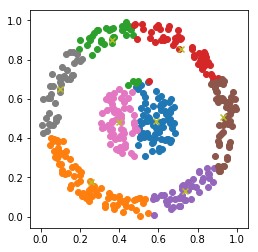

In [49]:
for i in range(km.k):
    points = X[km.labels==i].T
    plt.scatter(points[0],points[1])
plt.scatter(km.centers.T[0],km.centers.T[1], marker='x')
plt.axis('square')
pass

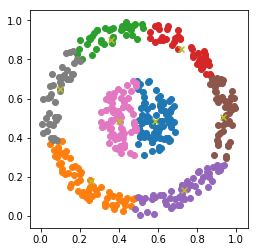

In [50]:
for i in range(km.k):
    points = X[km.predict(X)==i].T
    plt.scatter(points[0],points[1])
plt.scatter(km.centers.T[0],km.centers.T[1], marker='x')
plt.axis('square')
pass